In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import gdown
import NumericalExample2Funcs as ne

## Load in the dataset

In [30]:
# Download the dataset and a demo model
import gdown
import os

# Define the Google Drive file IDs and the output paths
files_to_download = {
    'https://drive.google.com/uc?export=download&id=1vO_pJdDu2L6OQVUUgFj-Dd4bwgIgUHCl': 'TrainingData/LowReFlowDataProcessed/dataLowReFLow.json',
    'https://drive.google.com/uc?export=download&id=1veoD7h0agWx9OJ64AxfUbG6CJcg16Ezm': 'Models/LowReFlow/model_9_xBC/P.npy',
    'https://drive.google.com/uc?export=download&id=1ooanhGS4LS4Jv4yFmEKllBQ0KP72-cKO': 'Models/LowReFlow/model_9_xBC/hyperParams.json',
    'https://drive.google.com/uc?export=download&id=10fCGwI5pfSWq18JsM7-hB9CIdnKIvUhH': 'Models/LowReFlow/model_9_xBC/history.json',
    'https://drive.google.com/uc?export=download&id=19L-Xu2YTiL1UtgyzAsaHXmBGT2VE17Ee': 'Models/LowReFlow/model_9_xBC/encoderB.keras',
    'https://drive.google.com/uc?export=download&id=15IGTI8B8xS1sC0ENuoA4VK-edhmH0NKk': 'Models/LowReFlow/model_9_xBC/encoder.keras',
    'https://drive.google.com/uc?export=download&id=1cW7utjdhfRDJ4lW1Yxi8QmK_Sq9BymH9': 'Models/LowReFlow/model_9_xBC/decoder.keras',
}

# Download each file
for url, output in files_to_download.items():
    print(f'Downloading {url} to {output}...')
    gdown.download(url, output, quiet=False)

print('All files downloaded successfully!')

Downloading...
From: https://drive.google.com/uc?export=download&id=1veoD7h0agWx9OJ64AxfUbG6CJcg16Ezm
To: /Users/jakubhorsky/Documents/Programming/PythonProjects/SINN_paper/Models2/LowReFlow/model_9_xBC/P.npy
100%|██████████| 1.42k/1.42k [00:00<00:00, 4.88MB/s]


Downloading...
From: https://drive.google.com/uc?export=download&id=1ooanhGS4LS4Jv4yFmEKllBQ0KP72-cKO
To: /Users/jakubhorsky/Documents/Programming/PythonProjects/SINN_paper/Models2/LowReFlow/model_9_xBC/hyperParams.json
100%|██████████| 3.38k/3.38k [00:00<00:00, 11.2MB/s]


Downloading...
From: https://drive.google.com/uc?export=download&id=10fCGwI5pfSWq18JsM7-hB9CIdnKIvUhH
To: /Users/jakubhorsky/Documents/Programming/PythonProjects/SINN_paper/Models2/LowReFlow/model_9_xBC/history.json
100%|██████████| 55.8k/55.8k [00:00<00:00, 595kB/s]


Downloading...
From: https://drive.google.com/uc?export=download&id=19L-Xu2YTiL1UtgyzAsaHXmBGT2VE17Ee
To: /Users/jakubhorsky/Documents/Programming/PythonProjects/SINN_paper/Models2/LowReFlow/model_9_xBC/encoderB.keras
100%|██████████| 1.15M/1.15M [00:00<00:00, 2.67MB/s]


Downloading...
From: https://drive.google.com/uc?export=download&id=15IGTI8B8xS1sC0ENuoA4VK-edhmH0NKk
To: /Users/jakubhorsky/Documents/Programming/PythonProjects/SINN_paper/Models2/LowReFlow/model_9_xBC/encoder.keras
100%|██████████| 1.03M/1.03M [00:00<00:00, 2.78MB/s]


Downloading...
From: https://drive.google.com/uc?export=download&id=1cW7utjdhfRDJ4lW1Yxi8QmK_Sq9BymH9
To: /Users/jakubhorsky/Documents/Programming/PythonProjects/SINN_paper/Models2/LowReFlow/model_9_xBC/decoder.keras
100%|██████████| 293k/293k [00:00<00:00, 1.31MB/s]

All files downloaded successfully!


In [ ]:
filePath = 'TrainingData/LowReFlowDataProcessed/dataLowReFLow.json'

# Select whether pressure should be included in the boundary data b
#   True - pressure will be included in b
#   False - pressure will not be included in b
pressubeBC = True

# Select weather normal gradient of the physical variables should be included in the boundary data
#   False - normal gradients will not be included
#   float - dx which is used to numerically compute the gradient
derL = 0.1

# Load boundary data and devide into test and train data (test dataset small for faster evaluation)
data = ne.loadData(filePath,derL,pressubeBC)
data_train = data[:-10]
data_test = data[-10:]

# Remesh the datasets for evaluation with a uniform triangular mesh 
el_size = 0.2
data_test_remesh = [ne.RemeshData(data_i,el_size) for data_i in data_test[:10]]
data_train_remesh = [ne.RemeshData(data_i,el_size) for data_i in data_train[:10]]

## Visualise examples from the dataset

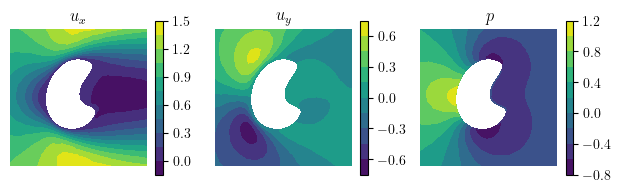

In [32]:
# Select an idx from the dataset to plot
idx_data = -9
nodes = data[idx_data]['nodes']
elements = data[idx_data]['elements']
u = data[idx_data]['solution']

ne.PlotFEMsolution(nodes, elements,u,axisLabels=False,labels=['$u_x$','$u_y$','$p$'],subplotsize=(2.5,2),dpi=100)

## Load in a trained model, make prediction and visualize results

In [33]:
# Load a model
modelFolder = r'Models/LowReFlow/model_9_xBC'
encoder,encoderB,decoder,P,history,hyperParams = ne.LoadModels(modelFolder)
r = hyperParams['n_latent']
nodesIE = np.array(hyperParams['nodesIE'])
distanceBE = np.array(hyperParams['distanceBE'])
nodesD = np.array(hyperParams['nodesD'])

Encoded latent fields


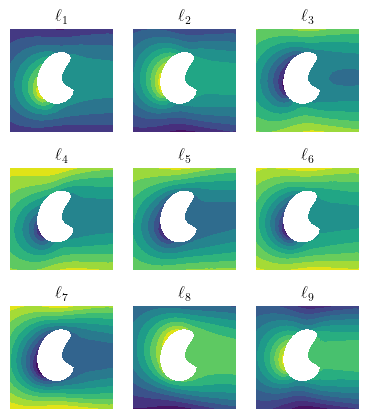

Solved latent fields


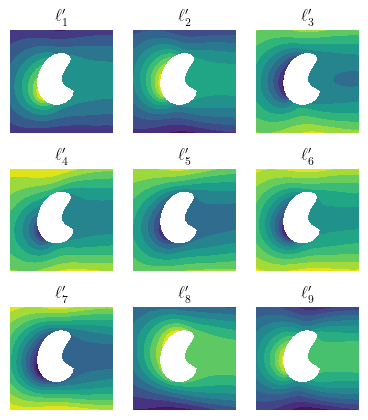

SINN predicted velocity fields


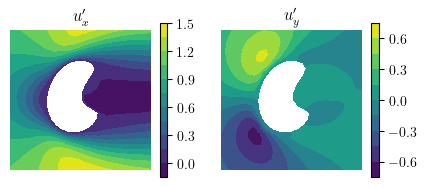

True velocity fields


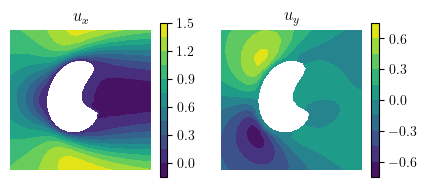

Error velocity fields


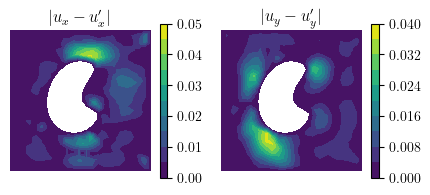

In [34]:
# Make a prediction

idx = 1 #pick a idx from the test dataset
data_idx_remeshed = data_test_remesh[idx]

l = ne.EncodeData(data_idx_remeshed,encoder,encoderB, nodesIE, distanceBE) # calculate the encoded latet variables $\epsilon(u)$
u_model, l_model = ne.SINNsPredict(data_idx_remeshed,encoderB,decoder,P,r,distanceBE) # predict the interior solution and solved latent variable $(\mathcal{E}_\mathcal{A} \circ \epsilon^\partial)(b)$


nodes = data_idx_remeshed['nodes']
elements = data_idx_remeshed['elements']

print("Encoded latent fields")
ne.PlotFEMsolution(nodes, elements,l,useColorBar=False, axisLabels=False, labels=[f'$\ell_{i+1}$' for i in range(r)],subplotsize=(1.5,1.7),dpi=100)
print("Solved latent fields")
ne.PlotFEMsolution(nodes, elements,l_model,useColorBar=False, axisLabels=False, labels=[f'$\ell_{i+1}\'$' for i in range(r)],subplotsize=(1.5,1.7),dpi=100)
print("SINN predicted velocity fields")
ne.PlotFEMsolution(nodes, elements,u_model,axisLabels=False,labels=['$u_x\'$','$u_y\'$'],subplotsize=(2.5,2),dpi=100)
print("True velocity fields")
ne.PlotFEMsolution(nodes, elements,data_idx_remeshed['solution'][...,:2],axisLabels=False,labels=['$u_x$','$u_y$'],subplotsize=(2.5,2),dpi=100)
print("Error velocity fields")
ne.PlotFEMsolution(nodes, elements,np.abs(data_idx_remeshed['solution'][...,:2]-u_model),axisLabels=False,labels=['$|u_x-u_x\'|$','$|u_y-u_y\'|$'],subplotsize=(2.5,2),dpi=100)

## Train your own model
- For best performance the hyperParams['fd_l_weight'] and learning_rate needs to be adjusted during training

In [10]:
@tf.function
def TrainStep(encoder, encoderB, decoder, B, optimizer, batchI, batchB, batchC, r, fd_l_weight, elliptc_weight):

    with tf.GradientTape() as enc_tape, tf.GradientTape() as encB_tape, tf.GradientTape() as dec_tape, tf.GradientTape() as b_tape:
        A = ne.GetA(B)
        lossI, loglossI = ne.InteriorForwardPass(encoder, decoder, A, r, *batchI, fd_l_weight, elliptc_weight)
        lossB, loglossB = ne.BoundaryForwardPass(encoder, encoderB, decoder, A, r, *batchB, fd_l_weight, elliptc_weight)
        lossC, loglossC = ne.CornerForwardPass(encoder, encoderB, decoder, A, r, *batchC, fd_l_weight, elliptc_weight)
        loss = tf.concat([lossI,lossB,lossC],0)

    grads_enc = enc_tape.gradient(loss,encoder.trainable_variables)
    grads_encB = encB_tape.gradient(loss,encoderB.trainable_variables)
    grads_dec = dec_tape.gradient(loss,decoder.trainable_variables)
    grads_b = b_tape.gradient(loss,B)
    optimizer.apply_gradients(zip(grads_enc,encoder.trainable_variables))
    optimizer.apply_gradients(zip(grads_dec,decoder.trainable_variables))
    optimizer.apply_gradients(zip(grads_encB,encoderB.trainable_variables))
    optimizer.apply_gradients(zip([grads_b],[B]))

    return loglossI+loglossB+loglossC

def TrainModel(encoder, encoderB, decoder, B, optimizer, dataset, dataset_b, dataset_c, r, epochs, n_batches, hyperParams, history=None, data_test=None, data_train=None):
    fd_l_weight = hyperParams['fd_l_weight']
    elliptc_weight = hyperParams['elliptc_weight']
    distanceBE = np.array(hyperParams['distanceBE'])
    if history is None:
        history = {'loss':[], 'loss_i':[], 'loss_b':[], 'loss_c': [],'r_loss_i':[],'r_loss_b':[],'r_loss_c':[],'fd_l_loss_i':[],'fd_l_loss_b':[],'fd_l_loss_c':[],'elliptic_loss':[],'err_train':[],'err_test':[],'err_epoch':[],'eta_test':[],'eta_train':[]}
    history_epoch = np.zeros((n_batches,12))
    for epoch in range(epochs):
        for i, (batchI, batchB, batchC) in enumerate(zip(dataset,dataset_b,dataset_c)):
            logloss = TrainStep(encoder, encoderB, decoder, B, optimizer, batchI, batchB, batchC, r, fd_l_weight, elliptc_weight)
            history_epoch[i,:] = logloss
            print(f'epoch: {epoch+1}/{epochs}; batch: {i+1}/{n_batches}; loss: {history_epoch[:,0].mean():.4g}', end='\r')
        
        logloss = history_epoch.mean(0)
        history['loss'].append((logloss[0]+logloss[4]+logloss[8])/3)
        history['loss_i'].append(logloss[0])
        history['loss_b'].append(logloss[4])
        history['loss_c'].append(logloss[8])
        history['r_loss_i'].append(logloss[1])
        history['r_loss_b'].append(logloss[5])
        history['r_loss_c'].append(logloss[9])
        history['fd_l_loss_i'].append(logloss[2])
        history['fd_l_loss_b'].append(logloss[6])
        history['fd_l_loss_c'].append(logloss[10])
        history['elliptic_loss'].append(logloss[3])
        print(f'epoch: {epoch+1}/{epochs}; batch: {i+1}/{n_batches}; loss: {history_epoch[:,0].mean():.4g}', end='')

        if (data_test is not None) and ((epoch+1)%5 == 0):
            mse_arr = np.zeros((len(data_test)))
            eta_arr = np.zeros((len(data_test)))
            for i in range(len(data_test)):
                mse_arr[i], eta_arr[i] = ne.SINNsEvalErr2(data_test[i],encoderB,decoder,B,r,distanceBE)
            history['err_test'].append(mse_arr.mean())
            history['eta_test'].append(eta_arr.mean())
            history['err_epoch'].append(len(history['loss'])-1)
            print(f'; err_test: {mse_arr.mean():.4g}', end='')
            if (data_train is not None):
                mse_arr_train = np.zeros((len(data_train)))
                eta_arr_train = np.zeros((len(data_train)))
                for i in range(len(data_train)):
                    # err_arr_train[i] = SINNsEvalErr(data_train[i],encoderB,decoder,B,r,distanceBE)
                    mse_arr_train[i], eta_arr_train[i] = ne.SINNsEvalErr2(data_train[i],encoderB,decoder,B,r,distanceBE)
                history['err_train'].append(mse_arr_train.mean())
                history['eta_train'].append(eta_arr_train.mean())
                print(f'; err_train: {mse_arr_train.mean():.4g}', end='')
            print()
        else:
            print()

    return history

batch_size = [128,64,16]
n_batches = 100
n_epochs = 15
layers = [256,256,256,256]
elSize = 0.23
hyperParams = {'N_interiorEncoder': None, 'd_interiorEncoder': 3, 'layers_interiorEncoder': layers,
               'N_boundarEncoder': None, 'd_boundarEncoder': data[0]['interpBS'][0].spline.c.shape[-1], 'layers_boundarEncoder': layers,
               'N_decoderOut': None, 'd_decoderOut': 2, 'layers_decoder': layers[:2],
               'n_latent': 9, 'activation': 'relu', 'elSizeMax': [elSize,elSize,0.25], 'elSizeMin': [elSize-0.001,elSize-0.001,0.25-0.001], 'variableElSize': None,
               'nIE1': 6, 'nIE2': 8, 'kIE': 1, 'sizeIE': 0.2, 'typeIE': 'radial',
               'nBE': 20, 'kBE': 0.7, 'sizeBE': 1,
               'nD1': 0, 'nD2': 0, 'kD': 0.5, 'sizeD': 0.1,
               'fd_l_weight': 0.06, 'elliptc_weight': 0}

if hyperParams['typeIE'] == 'radial':
    nodesIE = ne.GetRadialEncoderInputMask(hyperParams['nIE1'],hyperParams['nIE2'],k=hyperParams['kIE'],Esize=hyperParams['sizeIE'])
elif hyperParams['typeIE'] == 'squeare':
    nodesIE = ne.GetSquareEncoderInputMask(hyperParams['nIE1'],hyperParams['nIE2'],k=hyperParams['kIE'],Esize=hyperParams['sizeIE'])
else:
    raise ValueError('typeIE must be either "radial" or "squeare"')

distanceBE = ne.GetBoundaryEncoderInputMask(hyperParams['nBE'],k=hyperParams['kBE'],Esize=hyperParams['sizeBE'])
nodesD = ne.GetRadialEncoderInputMask(hyperParams['nD1'],hyperParams['nD2'],k=hyperParams['kD'],Esize=hyperParams['sizeD'])
hyperParams['N_interiorEncoder'] = nodesIE.shape[0]
hyperParams['N_boundarEncoder'] = distanceBE.shape[0]
hyperParams['N_decoderOut'] = nodesD.shape[0]
hyperParams['nodesIE'] = nodesIE.tolist()
hyperParams['distanceBE'] = distanceBE.tolist()
hyperParams['nodesD'] = nodesD.tolist()

dataset = ne.GetInteriorDatasetFixed(data_train[:1], nodesIE, nodesD, batch_size=batch_size[0], n_batches=n_batches, elSizeMin=hyperParams['elSizeMin'][0], elSizeMax=hyperParams['elSizeMax'][0], variableElSize=hyperParams['variableElSize'])
dataset_b = ne.GetBoundaryDatasetFixed(data_train[:1], nodesIE, distanceBE, nodesD, batch_size=batch_size[1], n_batches=n_batches, elSizeMin=hyperParams['elSizeMin'][1], elSizeMax=hyperParams['elSizeMax'][1], elSizeBF=hyperParams['variableElSize'])
dataset_c = ne.GetCornerDatasetFixed(data_train[:1], nodesIE, distanceBE, nodesD, batch_size=batch_size[2], n_batches=n_batches, elSizeMin=hyperParams['elSizeMin'][2], elSizeMax=hyperParams['elSizeMax'][2])

encoder,encoderB,decoder = ne.GetModels(hyperParams)
P = tf.Variable(tf.constant(tf.eye(hyperParams['n_latent']*2),dtype=tf.float32))
r = hyperParams['n_latent']

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-4)

history = TrainModel(encoder, encoderB, decoder, P, optimizer, dataset, dataset_b, dataset_c, r, n_epochs, n_batches, hyperParams,data_test=data_test_remesh[:10],data_train=data_train_remesh[:3])
# history = TrainModel(encoder, encoderB, decoder, P, optimizer, dataset, dataset_b, dataset_c, r, n_epochs, n_batches, hyperParams,history=history,data_test=data_test_remesh[:10],data_train=data_train_remesh[:1])

100%|██████████| 1600/1600 [00:00<00:00, 1912.12it/s]


epoch: 1/15; batch: 100/100; loss: 0.06785
epoch: 2/15; batch: 100/100; loss: 0.001063
epoch: 3/15; batch: 100/100; loss: 0.0007254
epoch: 4/15; batch: 100/100; loss: 0.0005428
epoch: 5/15; batch: 100/100; loss: 0.0004383; err_test: 0.0109; err_train: 0.01113
epoch: 6/15; batch: 100/100; loss: 0.000368
epoch: 7/15; batch: 100/100; loss: 0.0003147
epoch: 8/15; batch: 100/100; loss: 0.0002767
epoch: 9/15; batch: 100/100; loss: 0.0002469
epoch: 10/15; batch: 100/100; loss: 0.0002175; err_test: 0.008951; err_train: 0.009301
epoch: 11/15; batch: 100/100; loss: 0.0002019
epoch: 12/15; batch: 100/100; loss: 0.0001783
epoch: 13/15; batch: 100/100; loss: 0.0001619
epoch: 14/15; batch: 100/100; loss: 0.0001497
epoch: 15/15; batch: 100/100; loss: 0.000138; err_test: 0.007271; err_train: 0.007586


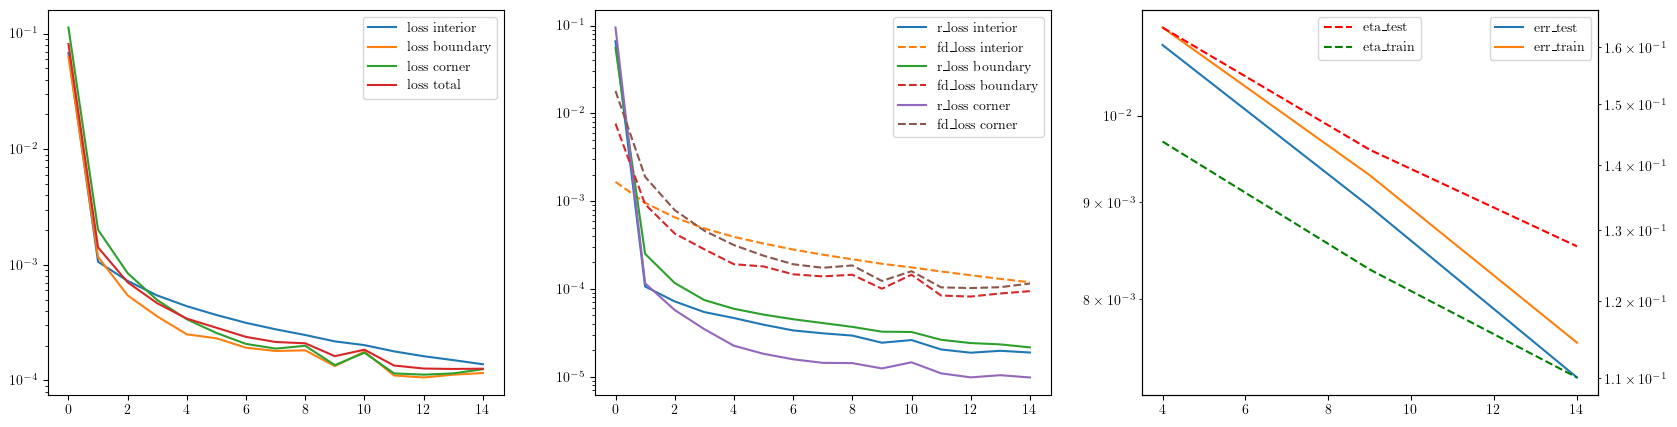

In [11]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot(history['loss_i'],label='loss interior')
plt.plot(history['loss_b'],label='loss boundary')
plt.plot(history['loss_c'],label='loss corner')
plt.plot(history['loss'],label='loss total')
plt.legend()
plt.gca().set_yscale('log')
plt.subplot(1,3,2)
plt.plot(history['r_loss_i'],label='r_loss interior')
plt.plot(np.array(history['fd_l_loss_i'])*hyperParams['fd_l_weight'],label='fd_loss interior', linestyle='--')
plt.plot(history['r_loss_b'],label='r_loss boundary')
plt.plot(np.array(history['fd_l_loss_b'])*hyperParams['fd_l_weight'],label='fd_loss boundary', linestyle='--')
plt.plot(history['r_loss_c'],label='r_loss corner')
plt.plot(np.array(history['fd_l_loss_c'])*hyperParams['fd_l_weight'],label='fd_loss corner', linestyle='--')
plt.legend()
plt.gca().set_yscale('log')
plt.subplot(1,3,3)
plt.plot(history['err_epoch'],history['err_test'],label='err_test')
plt.plot(history['err_epoch'],history['err_train'],label='err_train')
plt.legend()
plt.gca().set_yscale('log')
plt.gca().twinx()
plt.plot(history['err_epoch'],history['eta_test'],'--',label='eta_test',color='r')
plt.plot(history['err_epoch'],history['eta_train'],'--',label='eta_train',color='g')
plt.legend(loc = 'upper center')
plt.gca().set_yscale('log')